In [1]:
import numpy
import scipy.signal
from matplotlib.pyplot import *
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display
from filter_function import *
from spectrogram import *

import matplotlib.image as mpimg
import glob
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, UpSampling2D, Input,Dropout,Conv2DTranspose,Concatenate

Using TensorFlow backend.


In [2]:
original_dataset_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\recordings\\"

base_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\super_resolution"
train_dir = os.path.join(base_dir, 'train\\')

test_dir = os.path.join(base_dir, 'test\\')
train_dir_filtré=os.path.join(base_dir, 'train_dir_filtré\\')
test_dir_filtré=os.path.join(base_dir, 'test_dir_filtré\\')

In [3]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(train_dir_filtré)
os.mkdir(test_dir_filtré)

In [4]:
speakername=['_jackson_{}.wav','_nicolas_{}.wav','_theo_{}.wav','_yweweler_{}.wav']
for i in range(10):    
    for s in speakername:
        fnames_test=[str(i)+s.format(j) for j in range(5)]
        fnames_train=[str(i)+s.format(j) for j in range(5,50)]
        
        for fname in fnames_test:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(test_dir, fname)
            
            shutil.copyfile(src, dst)
            
        for fname in fnames_train:
             src = os.path.join(original_dataset_dir, fname)
             dst = os.path.join(train_dir, fname)
            
             shutil.copyfile(src, dst)
             
    i=i+1;


In [3]:



dir_to_spectro(test_dir,test_dir,spectrogram_dimensions=(128, 128),  cmap='gray_r')

In [5]:
print(train_dir)

dir_to_spectro(train_dir,train_dir,spectrogram_dimensions=(128, 128),  cmap='gray_r') 

C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution\train\


In [105]:
fce=0.09 #sr=22050 
ftype="butter"
ordre=4
b,a = creer_filter(fce,"highpass",ftype,ordre)
filter_path(train_dir,train_dir_filtré,b,a)
filter_path(test_dir,test_dir_filtré,b,a)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution\train\
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution\test\


In [106]:

dir_to_spectro(train_dir_filtré,train_dir_filtré,spectrogram_dimensions=(128, 128),  cmap='gray_r')

dir_to_spectro(test_dir_filtré,test_dir_filtré,spectrogram_dimensions=(128, 128),  cmap='gray_r')

ok
[[[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 ...

 [[0.8666667  0.8666667  0.8666667  1.        ]
  [0.8666667  0.8666667  0.8666667  1.        ]
  [0.86

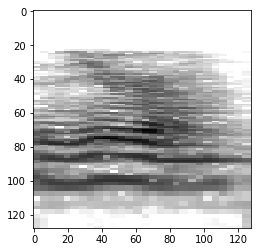

In [7]:
Xtrain_l=[]
Xtrain_filtered_l=[]
Xtest_l=[]
Xtest_filtered_l=[]
# arrays image must be created for the noisy test, the non-noisy test, the noisy train and the non-noisy train
for filepath in sorted(glob.glob(os.path.join(test_dir, "*.png"))):
    Xtest_l.append(mpimg.imread(filepath))

print("ok")    
print(Xtest_l[0])
print(Xtest_l[0].shape)
imshow(Xtest_l[0])


In [8]:
for filepath in sorted(glob.glob(os.path.join(train_dir, "*.png"))):
    Xtrain_l.append(mpimg.imread(filepath))    
for filepath in sorted(glob.glob(os.path.join(train_dir_filtré, "*.png"))):
    Xtrain_filtered_l.append(mpimg.imread(filepath))      
for filepath in sorted(glob.glob(os.path.join(test_dir_filtré, "*.png"))):
    Xtest_filtered_l.append(mpimg.imread(filepath))      


In [9]:
Xtest = np.asarray(Xtest_l)    
Xtrain = np.asarray(Xtrain_l)  
print("milieu conv ok")
Xtest_filtered=np.asarray(Xtest_filtered_l)
Xtrain_filtered=np.asarray(Xtrain_filtered_l)
print("conv fini")

print(Xtrain.shape)
print(Xtest.shape)
print(Xtrain_filtered.shape)
print(Xtest_filtered.shape)


milieu conv ok
conv fini
(1800, 128, 128, 4)
(200, 128, 128, 4)
(1800, 128, 128, 4)
(200, 128, 128, 4)


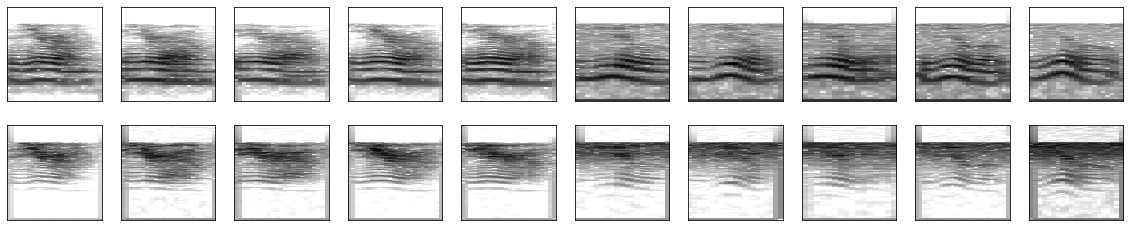

In [10]:
plt.figure(figsize=(20, 4)) #display the first 10 spectrogram  to check that appending is ok
n=10
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(Xtest[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display filtered
    ax = plt.subplot(2, n, i + 1+n)
    plt.imshow(Xtest_filtered[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
plt.show()

In [7]:
print(Xtest[0].shape)

(128, 128, 4)


In [11]:


#not sequential


input_img = Input(shape=(128, 128, 4))  # adapt this if using `channels_first` image data format

conv1= Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
max1= MaxPooling2D((2, 2), padding='same')(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(max1)
encoded = MaxPooling2D((2, 2), padding='same')(conv2)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)



decoded = Conv2D(4, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

#2nd model Denoiseing (Auto Encoder) Super Resolution CNN (DSRCNN) cf https://github.com/titu1994/Image-Super-Resolution 
#=> worse
# input_img = Input(shape=(128, 128, 4))  # adapt this if using `channels_first` image data format

# conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)

# conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
# encoded = Conv2DTranspose(32,(3, 3), padding='same')(conv2)

# merge1=Concatenate(axis=-1)([encoded,x2])
# deconv1=Conv2DTranspose(32,(3, 3), padding='same')(merge1)
# merge2=Concatenate(axis=-1)([deconv1,x1])

# decoded = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)


# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='mse')

# autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv

In [12]:
autoencoder.fit(Xtrain_filtered,Xtrain,epochs=60,
                batch_size=20,
                shuffle=True,
                validation_data=(Xtest_filtered, Xtest))

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 200 samples
Epoch 1/60
1800/1800 [==============================] - 99s 55ms/step - loss: 0.5059 - val_loss: 0.4620
Epoch 2/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4485 - val_loss: 0.4244
Epoch 3/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4240 - val_loss: 0.4180
Epoch 4/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4208 - val_loss: 0.4171
Epoch 5/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4177 - val_loss: 0.4141
Epoch 6/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4162 - val_loss: 0.4157
Epoch 7/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4139 - val_loss: 0.4115
Epoch 8/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4123 - val_loss: 0.4147
Epoch 9/60
1800/1800 [==============================] - 11s 6ms/step - loss: 0.4

In [14]:
autoencoder.save("C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\autoencoder_CNN.h5")



In [11]:
from keras.models import load_model
autoencoder=load_model("autoencoder_CNN.h5")
decoded_imgs = autoencoder.predict(Xtest_filtered)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


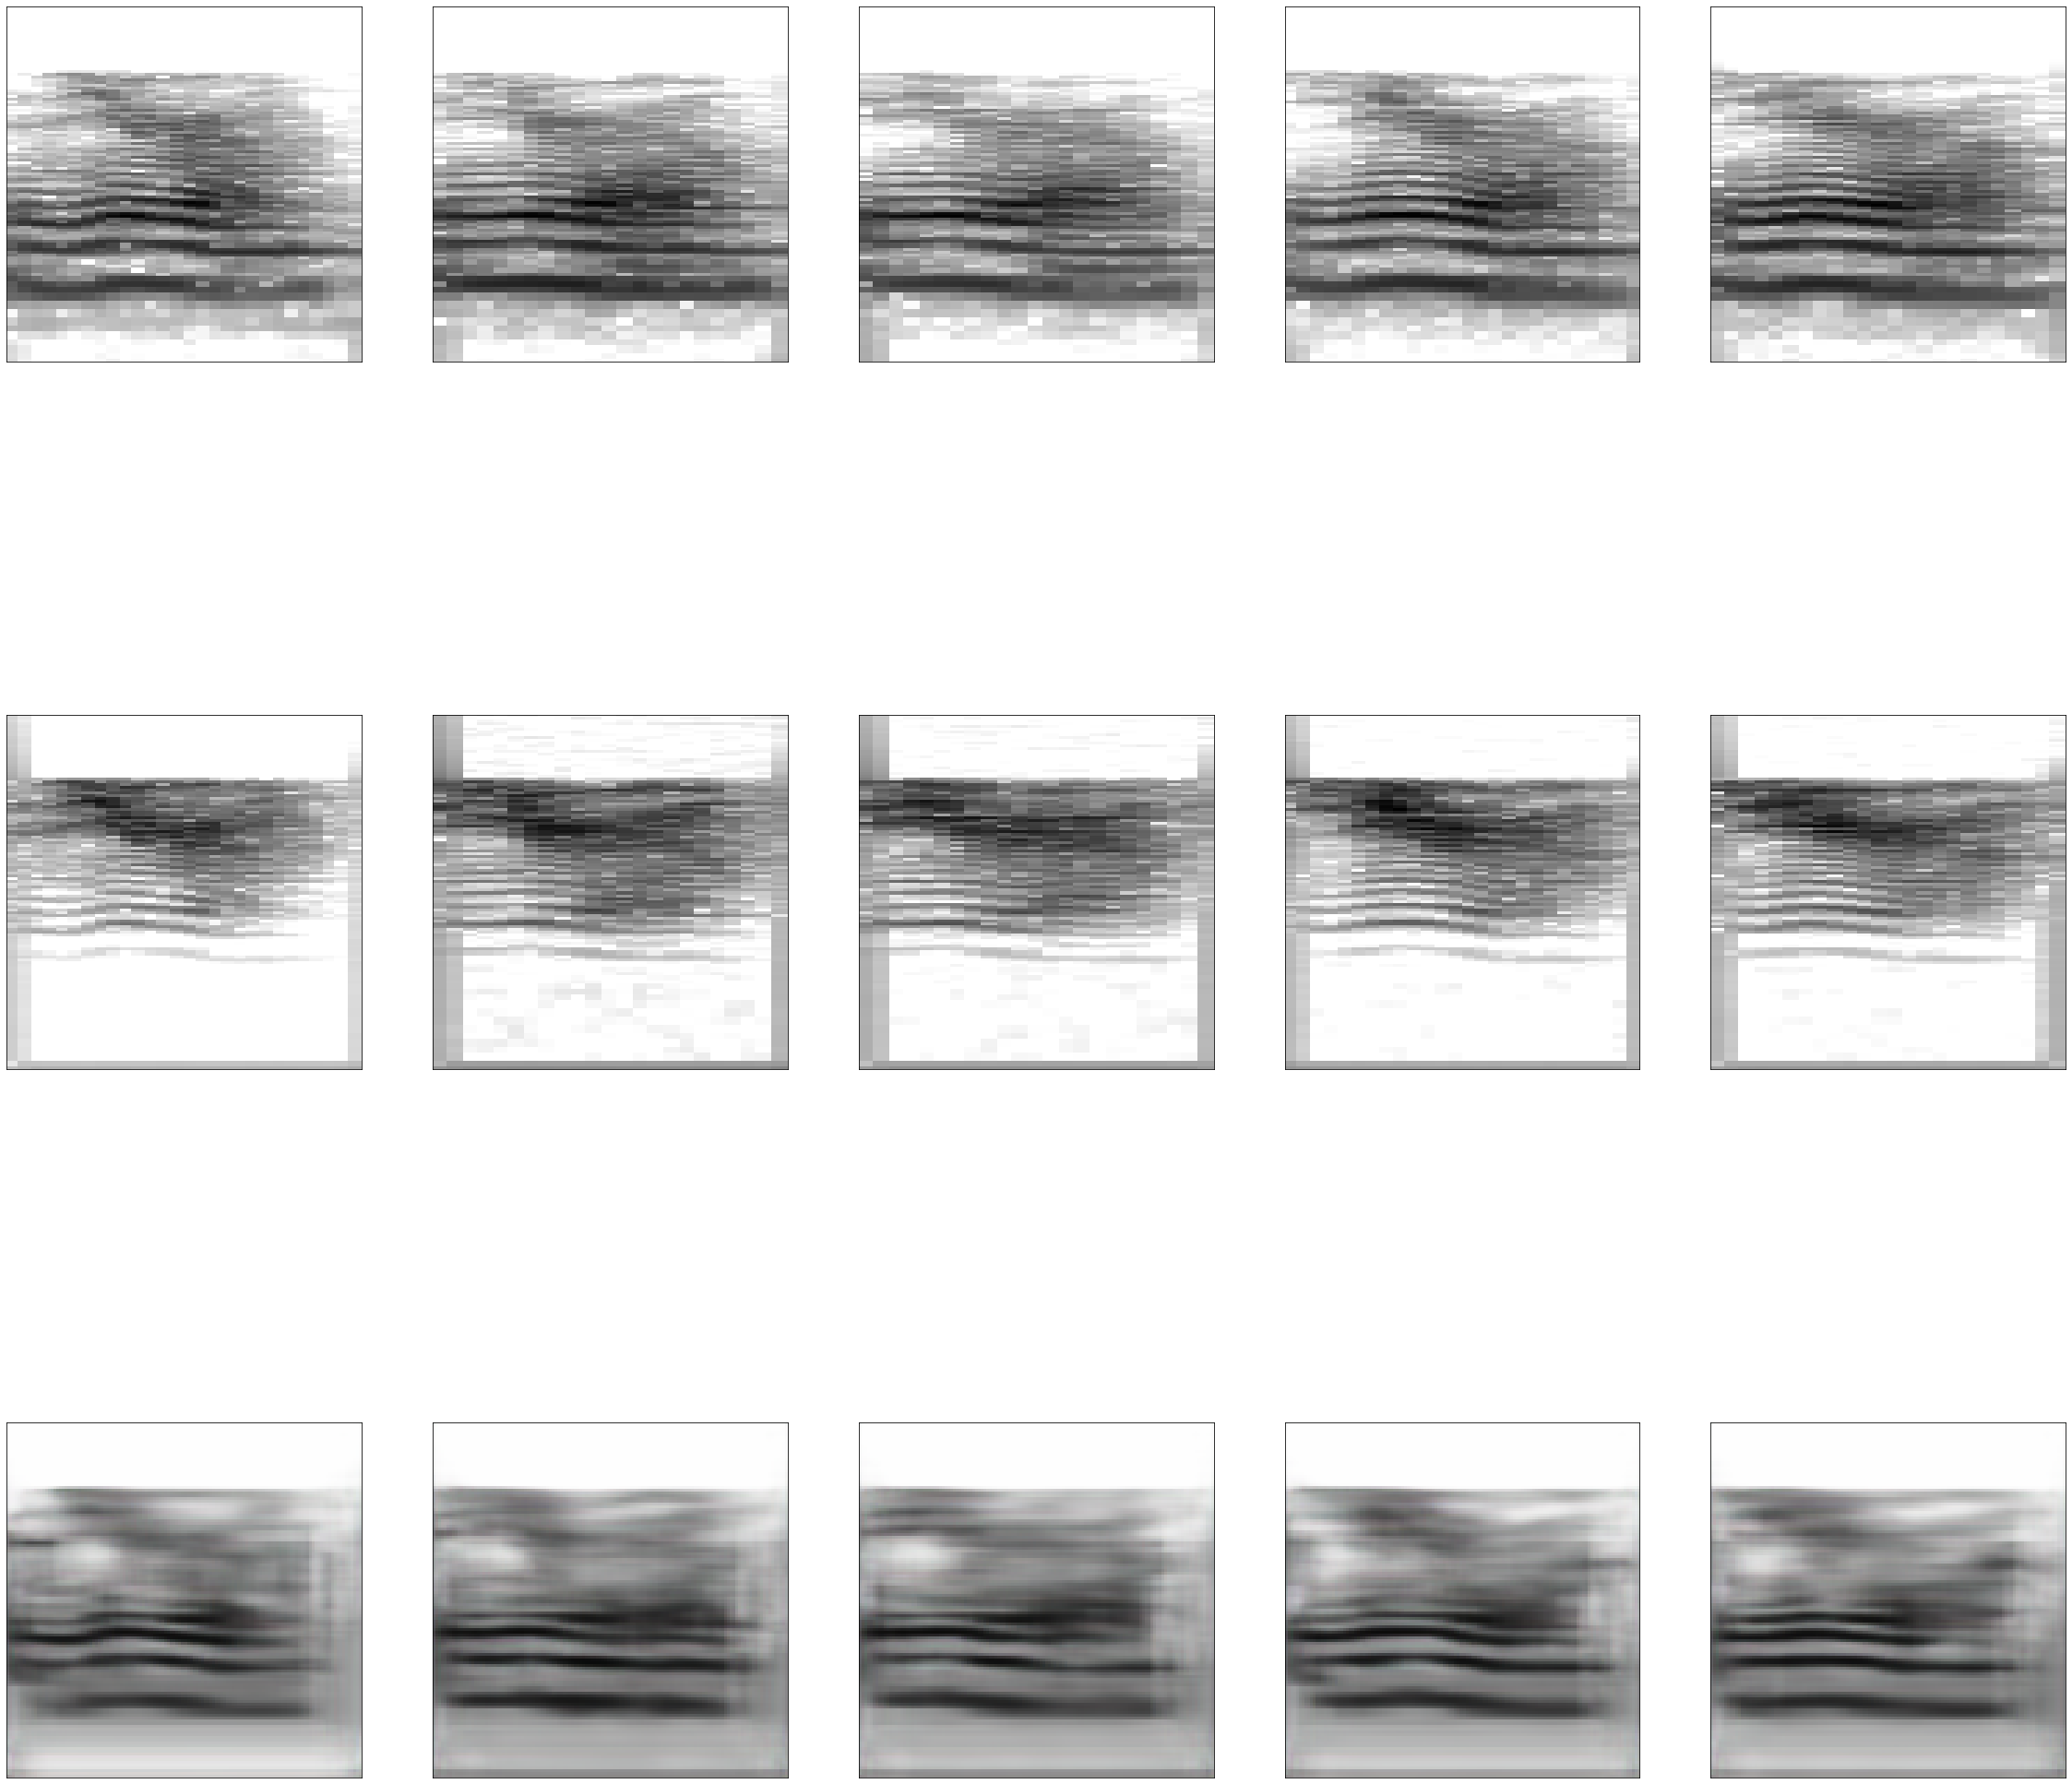

In [12]:
n = 5
plt.figure(figsize=(40, 40))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(Xtest[i])
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display original filtered
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(Xtest_filtered[i])
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + n+1+n)
    plt.imshow(decoded_imgs[i])
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
import IPython.display as ipd
import soundfile
from spectro_to_audio import *
from skimage import io, color
sr=22050
t1,xtest=scipy.signal.istft(color.rgb2gray(Xtest[0]),sr)
decoded_gray=color.rgb2gray(decoded_imgs[0])

print(decoded_gray.shape)
decoded_gray=numpy.power(10,decoded_gray)

t,y=scipy.signal.istft(decoded_gray,sr)
print(y.shape)
audio_path_record="C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\"
audio_path_record_out=os.path.join(audio_path_record,"0_jackson_0_reconstructed.wav")
audio_path_record_in=os.path.join(audio_path_record,"0_jackson_0_normal.wav")
soundfile.write(audio_path_record_out,y,sr)
soundfile.write(audio_path_record_in,xtest,sr)#soundwrite better than the librosa function

ipd.Audio(audio_path_record_out)


(128, 128)
(16129,)


In [31]:
print((color.rgb2gray(Xtest[0])).shape)
ipd.Audio(audio_path_record_in)

(128, 128)


[[0.9831268  0.9974644  0.99853903 ... 0.99459386 0.9919786  0.97384715]
 [0.991954   0.99889857 0.999211   ... 0.99811625 0.9972187  0.98704773]
 [0.9933063  0.9991514  0.9993268  ... 0.9980004  0.9973762  0.9886431 ]
 ...
 [0.70537525 0.6884067  0.6606867  ... 0.68818885 0.7162404  0.71570826]
 [0.7016427  0.6801463  0.6685662  ... 0.7113698  0.7287379  0.70719934]
 [0.5955296  0.63334304 0.64738274 ... 0.70974743 0.714267   0.6713859 ]]
[ 0.08836059  0.03735998 -0.00611552 ... -0.04678389  0.02809646
 -0.03766648]


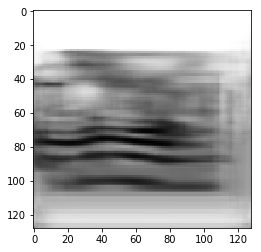

In [28]:
imshow(decoded_gray)
print(decoded_gray)
print(y)